<h1>CNN com MNIST</h1>

<h3>Importação de bibliotecas</h3>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [30]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

<h3>Carregamento do dataset</h3>

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Formato de x_train: {x_train.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de x_test:  {x_test.shape}")
print(f"Formato de y_test:  {y_test.shape}")

Formato de x_train: (60000, 28, 28)
Formato de y_train: (60000,)
Formato de x_test:  (10000, 28, 28)
Formato de y_test:  (10000,)


<h3>Visualização de amostras</h3>

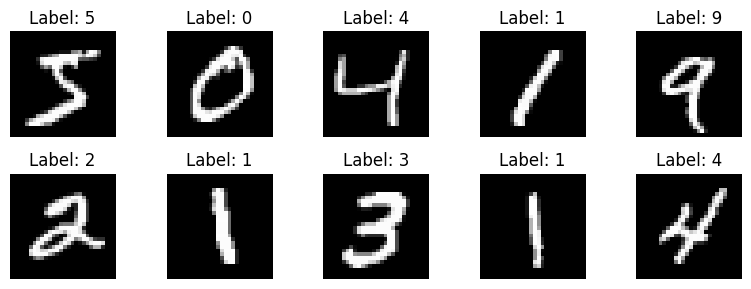

In [10]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<h3>Normalização dos pixels</h3>

In [21]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

<h3>Divisão do conjunto de validação</h3>

In [24]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(f"Tamanho treino: {x_train.shape[0]}")
print(f"Tamanho validação: {x_val.shape[0]}")
print(f"Tamanho teste: {x_test.shape[0]}")


Tamanho treino: 50000
Tamanho validação: 10000
Tamanho teste: 10000


In [39]:
y_train = to_categorical(y_train, 10)
y_val   = to_categorical(y_val, 10)
y_test  = to_categorical(y_test, 10)

<h3>Arquitetura do modelo</h3>

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,794 (651.54 KB)

 Trainable params: 165,322 (645.79 KB)

 Non-trainable params: 1,472 (5.75 KB)

<h3>Treinamento do modelo</h3>

In [42]:
history = model.fit(
     x_train, y_train,
     epochs=10,
     batch_size=128,
     validation_data=(x_val, y_val)
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8554 - loss: 0.4784 - val_accuracy: 0.1209 - val_loss: 5.2360
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9521 - loss: 0.1576 - val_accuracy: 0.9798 - val_loss: 0.0656
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9650 - loss: 0.1134 - val_accuracy: 0.9843 - val_loss: 0.0514
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9703 - loss: 0.0972 - val_accuracy: 0.9851 - val_loss: 0.0466
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9741 - loss: 0.0822 - val_accuracy: 0.9878 - val_loss: 0.0403
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9774 - loss: 0.0742 - val_accuracy: 0.9869 - val_loss: 0.0426
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9788 - loss: 0.0679 - val_accuracy: 0.9893 - val_loss: 0.0409
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9802 - loss: 0.0639 - 

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia no teste: {test_acc:.4f}")
print(f"Loss no teste: {test_loss:.4f}")

Acurácia no teste: 0.9901
Loss no teste: 0.0381


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


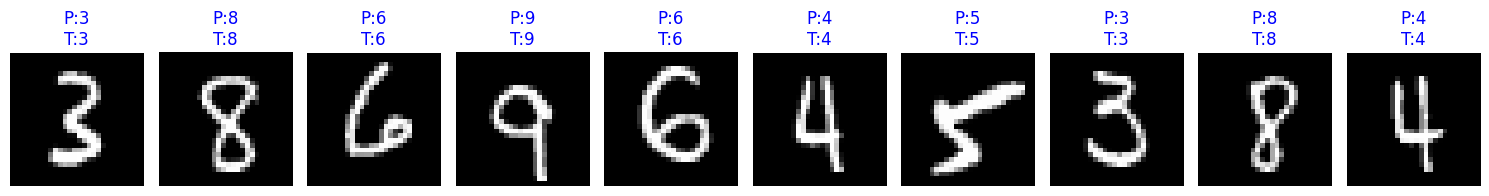

In [ ]:
predictions = model.predict(x_val)


predicted_labels = np.argmax(predictions, axis=1)

num_images = 10

y_val_labels = np.argmax(y_val, axis=1)

plt.figure(figsize=(15, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    true_label = y_val_labels[i]
    pred_label = predicted_labels[i]

    # Define o título — verde se acertou, vermelho se errou
    color = "blue" if true_label == pred_label else "red"
    plt.title(f"P:{pred_label}\nT:{true_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

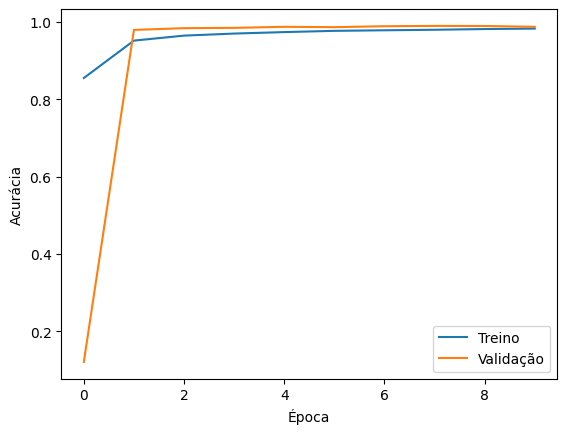

In [48]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()